# CMSC471 Artificial Intelligence

# Assignment-5: Classification and Regression with Neural Networks

*Connor Ragan AN72374* 

## Overview and Learning Objectives

You have learned the fundamentals of Neural Networks and Deep Learning. You have also learned how to train them based on the techniques discussed in lectures and the contents from Chapter 10 of the textbook (and you'll learn more on training deep neural networks in Chapter 11).

In Part I of this assignment, you are going to build a NN for classification. In Part II, you will build a NN for regression.

Pedagogically, this assignment will help you:
- better understand Neural Networks.

- practice with Tensorflow and Keras API.

- practice the skills you learned in sklearn and combine them with tf/keras to use in your project.

Notice that you should have Tensorflow version 2.0 installed and ready.

Alternatively, you may complete the assignment in [Colab](https://colab.research.google.com) but you need to run the following magic command in Colab to switch to version 2.0:

`%tensorflow_version 2.x`

<b>Important Notice:</b> Some outputs/plots are shared with you in this notebook for your reference. Some outputs are intentionally not shared. Notice that it is the strict course policy NOT to include any (or even parts) of the code solutions and/or answers to the questions in your posts in Piazza. 

In [1]:
# Import necessary Python/tf/keras modules
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
print("tf Version: ", tf.__version__)
print("Eager Execution mode: ", tf.executing_eagerly())

tf Version:  2.0.0
Eager Execution mode:  True


## Part I - Classification with NNs

First, [download the data](https://github.com/fereydoonvafaei/UMBC-CMSC-471-Fall-2019/blob/master/Assignment-5/diabetes.csv) `diabetes.csv` The target is to predict the onset of diabetes based on patient's features. You can read more about the data [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database).

In [3]:
# Load diabetes data with Pandas, it should be in the same working directory.
df = pd.read_csv("diabetes.csv")

print(df.shape)
df.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## <font color="red"> Required Coding

In [4]:
# Create X, y - Notice that X should contain all the features (columns) except 'Outcome'
# y should include only 'Outcome' because it's the label!
### START CODING HERE ###
X = df.drop(columns='Outcome')
y = df['Outcome']
### END CODING HERE ###

print(X.shape)
print(y.shape)

(768, 8)
(768,)


In [5]:
# Split the data to train and test with test_size=0.33 and random_state=66
### START CODING HERE ###
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
### END CODING HERE ###

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(514, 8)
(514,)
(254, 8)
(254,)


> There are different ways to load the data into tf tensors depeneding on your data type (image, text, etc). The following cell is one way of loading pandas dataframes to tensorflow tensors so that you can use tf/keras methods on them.

In [6]:
# Load train and test data to tf
train_tensor = tf.data.Dataset.from_tensor_slices((X_train.values, y_train.values))
test_tensor = tf.data.Dataset.from_tensor_slices((X_test.values, y_test.values))

In [7]:
type(train_tensor)

tensorflow.python.data.ops.dataset_ops.TensorSliceDataset

In [8]:
for feat, targ in train_tensor.take(5):
  print ('Features: {}, Target: {}'.format(feat, targ))

Features: [ 10.    115.     98.      0.      0.     24.      1.022  34.   ], Target: 0
Features: [  7.    142.     60.     33.    190.     28.8     0.687  61.   ], Target: 0
Features: [  4.    116.     72.     12.     87.     22.1     0.463  37.   ], Target: 0
Features: [  1.    126.     60.      0.      0.     30.1     0.349  47.   ], Target: 1
Features: [ 3.   78.   70.    0.    0.   32.5   0.27 39.  ], Target: 0


> As discussed in the lectures, data is fed into the network in batches (mini-batches).

In [9]:
# Batch train and test data
train_batch = train_tensor.shuffle(len(X_train)).batch(1)
test_batch = test_tensor.shuffle(len(X_test)).batch(1)

print(type(train_batch))
print(type(test_batch))

<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>
<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>


>Now, build the model based on the given architecture specifications.

## <font color="red"> Required Coding

In [10]:
### START CODING HERE ###
# Build a Sequential neural network - a classifier model
nn_clf = tf.keras.Sequential([
    # Create a dense layer with 12 units, input_dim=8, and 'relu' activation function ~ 1 line
    tf.keras.layers.Dense(12, input_dim=8, activation='relu'),
    # Create a dense layer with 8 units, and 'relu' activation function ~ 1 line
    tf.keras.layers.Dense(8, activation='relu'),
    # Create a dense layer with ? unit(s), and '?' activation function ~ 1 line
    # YOU should decide on the number of untis and the activation function for this last layer (output layer)
    # Hint: What type of ML task is this problem?
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])  
### END CODING HERE ###

In [11]:
### START CODING HERE ###
# Compile the model by 'adam' optimizer, 'binary_crossentropy' loss and 'accuracy' as metrics ~ 1 line
nn_clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
### END CODING HERE ###

In [12]:
### START CODING HERE ###
# Fit nn_clf model on train_batch with 150 epochs
nn_clf_history = nn_clf.fit(train_batch, epochs=150)
### END CODING HERE ###

Epoch 1/150
514/514 [==============================] - 2s 4ms/step - loss: 1.2951 - accuracy: 0.6187
Epoch 2/150
514/514 [==============================] - 0s 821us/step - loss: 0.7835 - accuracy: 0.6518
Epoch 3/150
514/514 [==============================] - 0s 828us/step - loss: 0.7174 - accuracy: 0.6479
Epoch 4/150
514/514 [==============================] - 0s 818us/step - loss: 0.6993 - accuracy: 0.6498
Epoch 5/150
514/514 [==============================] - 0s 820us/step - loss: 0.6650 - accuracy: 0.6537
Epoch 6/150
514/514 [==============================] - 0s 836us/step - loss: 0.6642 - accuracy: 0.6751
Epoch 7/150
514/514 [==============================] - 0s 857us/step - loss: 0.6735 - accuracy: 0.6732
Epoch 8/150
514/514 [==============================] - 0s 836us/step - loss: 0.6332 - accuracy: 0.6595
Epoch 9/150
514/514 [==============================] - 0s 845us/step - loss: 0.6206 - accuracy: 0.6732
Epoch 10/150
514/514 [==============================] - 0s 828us/step - los

514/514 [==============================] - 0s 853us/step - loss: 0.5266 - accuracy: 0.7218
Epoch 80/150
514/514 [==============================] - 0s 953us/step - loss: 0.5220 - accuracy: 0.7198
Epoch 81/150
514/514 [==============================] - 0s 882us/step - loss: 0.5263 - accuracy: 0.7451
Epoch 82/150
514/514 [==============================] - 0s 877us/step - loss: 0.5175 - accuracy: 0.7451
Epoch 83/150
514/514 [==============================] - 0s 950us/step - loss: 0.5111 - accuracy: 0.7432
Epoch 84/150
514/514 [==============================] - 0s 902us/step - loss: 0.5112 - accuracy: 0.7451
Epoch 85/150
514/514 [==============================] - 0s 873us/step - loss: 0.5108 - accuracy: 0.7412
Epoch 86/150
514/514 [==============================] - 0s 892us/step - loss: 0.5219 - accuracy: 0.7451
Epoch 87/150
514/514 [==============================] - 0s 871us/step - loss: 0.5099 - accuracy: 0.7549
Epoch 88/150
514/514 [==============================] - 0s 842us/step - loss:

> `history` now contains values for `loss` and `accuracy` during training, let's plot them.

(0, 1)

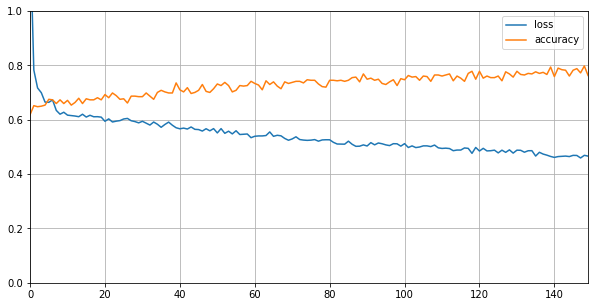

In [13]:
pd.DataFrame(nn_clf_history.history).plot(figsize=(10, 5))
plt.grid(True)

# set the y-axis range to [0-1]
plt.gca().set_ylim(0, 1) 

## <font color="red"> Required Coding

In [14]:
### START CODING HERE ###
# evaluate nn_clf model on test_batch using .evaluate method
nn_clf.evaluate(test_batch)
### END CODING HERE ###

254/254 [==============================] - 0s 791us/step - loss: 0.5964 - accuracy: 0.7008


[0.5964058039417076, 0.7007874]

In [15]:
nn_clf.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


> Now, let's plot ROC curve for this neural network model. Recall from Assignment-4 that you need to get class probabilities, fpr and tpr. To get class probabilities, keras has `predict()` method. Notice that it's applied on `X_test` not `test_batch`. Alternatively, you can use `predict_proba()` method, similar to sklearn, which would generate identical results.

In [16]:
# Get class probabilities for nn - ignore the warning
nn_preds = nn_clf.predict(X_test).ravel()

In [17]:
# See class probabilities predicted by nn classifier
nn_preds[:5]

array([0.7959636 , 0.13920298, 0.21497205, 0.25881165, 0.6209048 ],
      dtype=float32)

## <font color="red"> Required Coding

Text(0.5, 0, 'False Positive Rate')

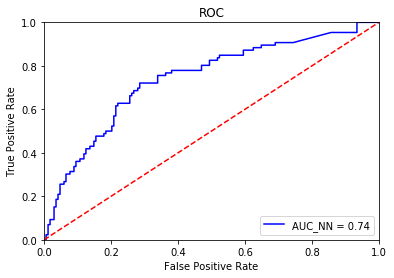

In [18]:
### START CODING HERE ### 
# Plot ROC curve for nn_clf - Write as many lines of code as needed
# Hint: check back your Assignment-4 code, you need to calculate tpr, fpr, thresholds
# Plot should have all the elements that Assignment-4 ROC curves had, title, xlabel and ylabel, xlim & ylim
# Plot should also have AUC_NN (roc_auc) shown on lower right
nn_fpr, nn_tpr, nn_threshold = metrics.roc_curve(y_test, nn_preds)
nn_roc_auc = metrics.auc(nn_fpr, nn_tpr)
plt.title('ROC')
plt.plot(nn_fpr, nn_tpr, 'b', label = 'AUC_NN = %0.2f' % nn_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### END CODING HERE ###

## Part I - Questions

<b>ANSWER THE FOLLOWING QUESTIONS HERE:</b><br>

Q1 - If this problem was a multi-class classification, what activation function would you use for the output layer neurons? How many neurons would be required for the output layer for multi-class? What other hyperparameters of nn can you change in different tasks? Name at least 3 other hyperparameters. GIVE COMPLETE ANSWER!

If this were a multi-class classification, the output layer would use Softmax as the activation function. A neuron would be required for each class in the classification. Other hyperparameters of the nn are learning rate, batch size, and the number of hidden layers & the number of neurons in those layers.

Q2 - Change the batch number from 1 to 10. Would it improve or hurt the results? Make an argument with reasoning on your observation (you may consult with page 326 of the textbook).

It would improve the results. A larger batch size is less prone to fluctuation, and the larger batch size will train the model faster because it updates the weights less frequently.

## Part II - Regression with NNs

In this part, you will create a neural network to do a regression task.

[Download the data from here](https://github.com/fereydoonvafaei/UMBC-CMSC-471-Fall-2019/blob/master/Assignment-5/auto.csv). This is cars dataset. You can read more about the data [here](https://archive.ics.uci.edu/ml/datasets/auto+mpg). The goal is predicting MPG based on other features.

In [20]:
auto_data = pd.read_csv('auto.csv')
print(auto_data.shape)
auto_data.head()

(398, 8)


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [21]:
auto_data.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

## <font color="red"> Required Coding

In [22]:
### START CODING HERE ### 
# Drop all na's using dataframe .dropna(inplace=True) method ~ 1 line
auto_data.dropna(inplace=True)
### END CODING HERE ###
auto_data.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

>For some datasets like this, a technique in data preprocessing is used to encode categorical features to dummy variables. Here, we convert <b>Origin</b> (which looks numeric but is actually categorical) using pandas [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) method. This technique is one example of One Hot Encoding of categorical features.

In [23]:
auto_data['Origin'] = auto_data['Origin'].map(lambda x: {1: 'USA', 2: 'Europe', 3: 'Japan'}.get(x))
auto_data = pd.get_dummies(auto_data, prefix='', prefix_sep='')
print(auto_data.shape)
auto_data.head()

(392, 10)


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1


## <font color="red"> Required Coding

In [24]:
### START CODING HERE ### 
# Create X and y, X should contain all features except MPG column and y should only contain MPG column
# Hint: You can use dataframe .pop() method, but you may need to create a deep copy of the dataframe first
# There are usually multiple ways of doing these operations in pnadas dataframes
X = auto_data.drop(columns='MPG')
y = auto_data['MPG']
### END CODING HERE ###
print(X.shape)
print(y.shape)
X.head()

(392, 9)
(392,)


,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,8,302.0,140.0,3449.0,10.5,70,0,0,1


> <b>Note:</b> The original auto_data dataframe should remain the same and should still include MPG.

In [25]:
auto_data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1


>Normalization is a good pratice when you work with values with different ranges.

In [26]:
# Normalize X 
X = (X - X.mean())/X.std()
print(X.shape)
X.head()

(392, 9)


,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,1.482053,1.075915,0.663285,0.619748,-1.283618,-1.623241,-0.457538,-0.501749,0.773608
1,1.482053,1.486832,1.572585,0.842258,-1.464852,-1.623241,-0.457538,-0.501749,0.773608
2,1.482053,1.181033,1.182885,0.539692,-1.646086,-1.623241,-0.457538,-0.501749,0.773608
3,1.482053,1.047246,1.182885,0.536160,-1.283618,-1.623241,-0.457538,-0.501749,0.773608
4,1.482053,1.028134,0.923085,0.554997,-1.827320,-1.623241,-0.457538,-0.501749,0.773608


## <font color="red"> Required Coding

In [27]:
### START CODING HERE ###
# Split the data to train and test using train_test_split method with test_size=0.2 and random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
### END CODING HERE ###

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(313, 9)
(313,)
(79, 9)
(79,)


In [28]:
### START CODING HERE ### 
# Build a neural network for regression
nn_reg1 = tf.keras.Sequential([
    # Create a dense layer with 64 neurons, 'relu' activation function and input_shape=[len(X_train.keys())]
    tf.keras.layers.Dense(64, input_shape=[len(X_train.keys())], activation='relu'),
    # Create a dense layer with 64 neurons and 'relu' activation function
    tf.keras.layers.Dense(64, activation='relu'),
    # Create a dense layer with ? neuron(s) and ? activation
    # YOU should decide how many neuron(s) is/are needed and what activation function (if any) to use for output
    # Hint: What type of ML task is this problem?
    tf.keras.layers.Dense(1, activation='linear')
    ])
### END CODING HERE ###

In [29]:
# This is another way of defining the optimizer, you can pass learning_rate and other parameters to it.
optimizer = tf.keras.optimizers.RMSprop(0.001)

### START CODING HERE ### 
# Compile nn_reg1 with 'mse' loss, optimizer=optimizer, metrics=['mae', 'mse']
nn_reg1.compile(optimizer=optimizer, loss='mse', metrics=['mae','mse'])
### END CODING HERE ###

In [30]:
nn_reg1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


## <font color="red"> Required Coding

In [31]:
EPOCHS = 1000

### START CODING HERE ### 
# fit nn_reg1 on X_train, y_train, epochs=EPOCHS, validation_split=0.2, verbose=1
nn_reg1_history = nn_reg1.fit(X_train, y_train, epochs=EPOCHS, validation_split=0.2, verbose=1)
### END CODING HERE ###

Train on 250 samples, validate on 63 samples
Epoch 1/1000
250/250 [==============================] - 0s 456us/sample - loss: 558.0719 - mae: 22.2321 - mse: 558.0720 - val_loss: 607.2926 - val_mae: 23.3596 - val_mse: 607.2925
Epoch 2/1000
250/250 [==============================] - 0s 40us/sample - loss: 502.6912 - mae: 20.8731 - mse: 502.6912 - val_loss: 553.3680 - val_mae: 22.1409 - val_mse: 553.3680
Epoch 3/1000
250/250 [==============================] - 0s 48us/sample - loss: 449.4547 - mae: 19.4866 - mse: 449.4547 - val_loss: 495.1366 - val_mae: 20.7590 - val_mse: 495.1366
Epoch 4/1000
250/250 [==============================] - 0s 48us/sample - loss: 393.9499 - mae: 17.9455 - mse: 393.9499 - val_loss: 432.9875 - val_mae: 19.1866 - val_mse: 432.9875
Epoch 5/1000
250/250 [==============================] - 0s 52us/sample - loss: 335.6201 - mae: 16.2110 - mse: 335.6201 - val_loss: 365.6902 - val_mae: 17.4253 - val_mse: 365.6902
Epoch 6/1000
250/250 [==============================] - 0s 

250/250 [==============================] - 0s 36us/sample - loss: 7.1327 - mae: 1.9137 - mse: 7.1327 - val_loss: 6.6839 - val_mae: 1.8743 - val_mse: 6.6839
Epoch 48/1000
250/250 [==============================] - 0s 48us/sample - loss: 7.0700 - mae: 1.9105 - mse: 7.0700 - val_loss: 6.2960 - val_mae: 1.8110 - val_mse: 6.2960
Epoch 49/1000
250/250 [==============================] - 0s 44us/sample - loss: 7.0003 - mae: 1.9162 - mse: 7.0003 - val_loss: 6.8421 - val_mae: 1.8929 - val_mse: 6.8421
Epoch 50/1000
250/250 [==============================] - 0s 48us/sample - loss: 7.0144 - mae: 1.9066 - mse: 7.0144 - val_loss: 6.7591 - val_mae: 1.8851 - val_mse: 6.7591
Epoch 51/1000
250/250 [==============================] - 0s 44us/sample - loss: 7.0947 - mae: 1.9242 - mse: 7.0947 - val_loss: 6.4875 - val_mae: 1.8444 - val_mse: 6.4875
Epoch 52/1000
250/250 [==============================] - 0s 52us/sample - loss: 7.1233 - mae: 1.9432 - mse: 7.1233 - val_loss: 6.7950 - val_mae: 1.8856 - val_mse: 6

250/250 [==============================] - 0s 48us/sample - loss: 6.1789 - mae: 1.7613 - mse: 6.1789 - val_loss: 5.9494 - val_mae: 1.7766 - val_mse: 5.9494
Epoch 96/1000
250/250 [==============================] - 0s 40us/sample - loss: 6.2221 - mae: 1.7829 - mse: 6.2221 - val_loss: 5.7671 - val_mae: 1.7438 - val_mse: 5.7671
Epoch 97/1000
250/250 [==============================] - 0s 44us/sample - loss: 6.2912 - mae: 1.7801 - mse: 6.2912 - val_loss: 5.9466 - val_mae: 1.7703 - val_mse: 5.9466
Epoch 98/1000
250/250 [==============================] - 0s 44us/sample - loss: 6.0742 - mae: 1.7641 - mse: 6.0742 - val_loss: 5.7379 - val_mae: 1.7403 - val_mse: 5.7379
Epoch 99/1000
250/250 [==============================] - 0s 44us/sample - loss: 6.1022 - mae: 1.7921 - mse: 6.1022 - val_loss: 6.5137 - val_mae: 1.8610 - val_mse: 6.5137
Epoch 100/1000
250/250 [==============================] - 0s 44us/sample - loss: 5.9413 - mae: 1.7585 - mse: 5.9413 - val_loss: 6.5044 - val_mae: 1.8518 - val_mse: 

250/250 [==============================] - 0s 48us/sample - loss: 5.7820 - mae: 1.7332 - mse: 5.7820 - val_loss: 6.9653 - val_mae: 1.8899 - val_mse: 6.9653
Epoch 144/1000
250/250 [==============================] - 0s 44us/sample - loss: 5.8106 - mae: 1.7243 - mse: 5.8106 - val_loss: 6.8068 - val_mae: 1.8630 - val_mse: 6.8068
Epoch 145/1000
250/250 [==============================] - 0s 44us/sample - loss: 5.7218 - mae: 1.6977 - mse: 5.7218 - val_loss: 6.1009 - val_mae: 1.7965 - val_mse: 6.1009
Epoch 146/1000
250/250 [==============================] - 0s 40us/sample - loss: 5.8128 - mae: 1.7172 - mse: 5.8128 - val_loss: 5.8754 - val_mae: 1.7646 - val_mse: 5.8754
Epoch 147/1000
250/250 [==============================] - 0s 40us/sample - loss: 5.6470 - mae: 1.7165 - mse: 5.6470 - val_loss: 5.7406 - val_mae: 1.7557 - val_mse: 5.7406
Epoch 148/1000
250/250 [==============================] - 0s 44us/sample - loss: 5.9554 - mae: 1.7145 - mse: 5.9554 - val_loss: 6.3806 - val_mae: 1.8081 - val_m

Epoch 191/1000
250/250 [==============================] - 0s 48us/sample - loss: 5.4550 - mae: 1.6682 - mse: 5.4550 - val_loss: 5.6682 - val_mae: 1.7478 - val_mse: 5.6682
Epoch 192/1000
250/250 [==============================] - 0s 48us/sample - loss: 5.2344 - mae: 1.6141 - mse: 5.2344 - val_loss: 5.9769 - val_mae: 1.7586 - val_mse: 5.9769
Epoch 193/1000
250/250 [==============================] - 0s 48us/sample - loss: 5.3818 - mae: 1.6207 - mse: 5.3818 - val_loss: 5.8019 - val_mae: 1.7421 - val_mse: 5.8019
Epoch 194/1000
250/250 [==============================] - 0s 40us/sample - loss: 5.5096 - mae: 1.6812 - mse: 5.5096 - val_loss: 5.7193 - val_mae: 1.7634 - val_mse: 5.7193
Epoch 195/1000
250/250 [==============================] - 0s 44us/sample - loss: 5.4076 - mae: 1.6602 - mse: 5.4076 - val_loss: 5.6588 - val_mae: 1.7375 - val_mse: 5.6588
Epoch 196/1000
250/250 [==============================] - 0s 64us/sample - loss: 5.4573 - mae: 1.6683 - mse: 5.4573 - val_loss: 6.9806 - val_mae:

Epoch 239/1000
250/250 [==============================] - 0s 40us/sample - loss: 5.3269 - mae: 1.6285 - mse: 5.3269 - val_loss: 5.8723 - val_mae: 1.7444 - val_mse: 5.8723
Epoch 240/1000
250/250 [==============================] - 0s 40us/sample - loss: 5.0257 - mae: 1.5687 - mse: 5.0257 - val_loss: 6.5589 - val_mae: 1.8288 - val_mse: 6.5589
Epoch 241/1000
250/250 [==============================] - 0s 44us/sample - loss: 4.8662 - mae: 1.5497 - mse: 4.8662 - val_loss: 5.4710 - val_mae: 1.7122 - val_mse: 5.4710
Epoch 242/1000
250/250 [==============================] - 0s 40us/sample - loss: 5.0514 - mae: 1.5888 - mse: 5.0514 - val_loss: 6.6534 - val_mae: 1.8491 - val_mse: 6.6534
Epoch 243/1000
250/250 [==============================] - 0s 40us/sample - loss: 5.1908 - mae: 1.6011 - mse: 5.1908 - val_loss: 5.5190 - val_mae: 1.7347 - val_mse: 5.5190
Epoch 244/1000
250/250 [==============================] - 0s 40us/sample - loss: 5.2184 - mae: 1.6157 - mse: 5.2184 - val_loss: 6.6107 - val_mae:

250/250 [==============================] - 0s 40us/sample - loss: 4.9071 - mae: 1.5714 - mse: 4.9071 - val_loss: 6.7120 - val_mae: 1.8442 - val_mse: 6.7120
Epoch 287/1000
250/250 [==============================] - 0s 40us/sample - loss: 5.0789 - mae: 1.5499 - mse: 5.0789 - val_loss: 5.8343 - val_mae: 1.7414 - val_mse: 5.8343
Epoch 288/1000
250/250 [==============================] - 0s 40us/sample - loss: 4.8898 - mae: 1.5314 - mse: 4.8898 - val_loss: 6.8382 - val_mae: 1.8703 - val_mse: 6.8382
Epoch 289/1000
250/250 [==============================] - 0s 56us/sample - loss: 5.1147 - mae: 1.5770 - mse: 5.1147 - val_loss: 6.1246 - val_mae: 1.7589 - val_mse: 6.1246
Epoch 290/1000
250/250 [==============================] - 0s 52us/sample - loss: 4.8447 - mae: 1.5253 - mse: 4.8447 - val_loss: 6.1477 - val_mae: 1.7728 - val_mse: 6.1477
Epoch 291/1000
250/250 [==============================] - 0s 48us/sample - loss: 4.9131 - mae: 1.5653 - mse: 4.9131 - val_loss: 5.5203 - val_mae: 1.7268 - val_m

Epoch 334/1000
250/250 [==============================] - 0s 44us/sample - loss: 4.9000 - mae: 1.5380 - mse: 4.9000 - val_loss: 5.4635 - val_mae: 1.7228 - val_mse: 5.4635
Epoch 335/1000
250/250 [==============================] - 0s 76us/sample - loss: 4.8906 - mae: 1.5265 - mse: 4.8906 - val_loss: 5.6558 - val_mae: 1.7512 - val_mse: 5.6558
Epoch 336/1000
250/250 [==============================] - 0s 40us/sample - loss: 4.6484 - mae: 1.4950 - mse: 4.6484 - val_loss: 5.8743 - val_mae: 1.7445 - val_mse: 5.8743
Epoch 337/1000
250/250 [==============================] - 0s 52us/sample - loss: 4.6887 - mae: 1.4951 - mse: 4.6887 - val_loss: 5.9668 - val_mae: 1.7669 - val_mse: 5.9668
Epoch 338/1000
250/250 [==============================] - 0s 48us/sample - loss: 4.9534 - mae: 1.5422 - mse: 4.9534 - val_loss: 6.6649 - val_mae: 1.8702 - val_mse: 6.6649
Epoch 339/1000
250/250 [==============================] - 0s 48us/sample - loss: 4.6993 - mae: 1.5000 - mse: 4.6993 - val_loss: 6.2739 - val_mae:

Epoch 382/1000
250/250 [==============================] - 0s 36us/sample - loss: 4.5849 - mae: 1.4652 - mse: 4.5849 - val_loss: 5.4698 - val_mae: 1.7299 - val_mse: 5.4698
Epoch 383/1000
250/250 [==============================] - 0s 48us/sample - loss: 4.9302 - mae: 1.5434 - mse: 4.9302 - val_loss: 5.6381 - val_mae: 1.7799 - val_mse: 5.6381
Epoch 384/1000
250/250 [==============================] - 0s 44us/sample - loss: 4.5702 - mae: 1.4960 - mse: 4.5702 - val_loss: 5.6394 - val_mae: 1.7307 - val_mse: 5.6394
Epoch 385/1000
250/250 [==============================] - 0s 48us/sample - loss: 4.9251 - mae: 1.5214 - mse: 4.9251 - val_loss: 6.1195 - val_mae: 1.8051 - val_mse: 6.1195
Epoch 386/1000
250/250 [==============================] - 0s 52us/sample - loss: 4.5374 - mae: 1.4720 - mse: 4.5374 - val_loss: 6.5063 - val_mae: 1.8199 - val_mse: 6.5063
Epoch 387/1000
250/250 [==============================] - 0s 48us/sample - loss: 4.4228 - mae: 1.4390 - mse: 4.4228 - val_loss: 5.5875 - val_mae:

250/250 [==============================] - 0s 40us/sample - loss: 4.5200 - mae: 1.4603 - mse: 4.5200 - val_loss: 6.2425 - val_mae: 1.8291 - val_mse: 6.2425
Epoch 430/1000
250/250 [==============================] - 0s 48us/sample - loss: 4.3900 - mae: 1.4225 - mse: 4.3900 - val_loss: 5.5477 - val_mae: 1.7741 - val_mse: 5.5477
Epoch 431/1000
250/250 [==============================] - 0s 52us/sample - loss: 4.6259 - mae: 1.5061 - mse: 4.6259 - val_loss: 6.9158 - val_mae: 1.9040 - val_mse: 6.9158
Epoch 432/1000
250/250 [==============================] - 0s 56us/sample - loss: 4.5034 - mae: 1.4531 - mse: 4.5034 - val_loss: 6.5688 - val_mae: 1.8725 - val_mse: 6.5688
Epoch 433/1000
250/250 [==============================] - 0s 48us/sample - loss: 4.4255 - mae: 1.4538 - mse: 4.4255 - val_loss: 6.5556 - val_mae: 1.8208 - val_mse: 6.5556
Epoch 434/1000
250/250 [==============================] - 0s 44us/sample - loss: 4.4522 - mae: 1.4461 - mse: 4.4522 - val_loss: 6.6390 - val_mae: 1.8505 - val_m

Epoch 477/1000
250/250 [==============================] - 0s 40us/sample - loss: 4.3225 - mae: 1.4011 - mse: 4.3225 - val_loss: 6.1020 - val_mae: 1.8083 - val_mse: 6.1020
Epoch 478/1000
250/250 [==============================] - 0s 40us/sample - loss: 4.3831 - mae: 1.4348 - mse: 4.3831 - val_loss: 7.2040 - val_mae: 1.9317 - val_mse: 7.2040
Epoch 479/1000
250/250 [==============================] - 0s 40us/sample - loss: 4.3868 - mae: 1.4114 - mse: 4.3868 - val_loss: 6.7311 - val_mae: 1.8662 - val_mse: 6.7311
Epoch 480/1000
250/250 [==============================] - 0s 48us/sample - loss: 4.4245 - mae: 1.4373 - mse: 4.4245 - val_loss: 7.4663 - val_mae: 1.9729 - val_mse: 7.4663
Epoch 481/1000
250/250 [==============================] - 0s 52us/sample - loss: 4.2856 - mae: 1.4039 - mse: 4.2856 - val_loss: 6.0196 - val_mae: 1.7969 - val_mse: 6.0196
Epoch 482/1000
250/250 [==============================] - 0s 44us/sample - loss: 4.4544 - mae: 1.4285 - mse: 4.4544 - val_loss: 7.2254 - val_mae:

250/250 [==============================] - 0s 40us/sample - loss: 4.3054 - mae: 1.3856 - mse: 4.3054 - val_loss: 6.2275 - val_mae: 1.8132 - val_mse: 6.2275
Epoch 525/1000
250/250 [==============================] - 0s 40us/sample - loss: 4.2770 - mae: 1.4472 - mse: 4.2770 - val_loss: 6.0092 - val_mae: 1.8153 - val_mse: 6.0092
Epoch 526/1000
250/250 [==============================] - 0s 52us/sample - loss: 4.1683 - mae: 1.3964 - mse: 4.1683 - val_loss: 7.0417 - val_mae: 1.9482 - val_mse: 7.0417
Epoch 527/1000
250/250 [==============================] - 0s 44us/sample - loss: 4.2199 - mae: 1.3944 - mse: 4.2199 - val_loss: 6.8826 - val_mae: 1.8986 - val_mse: 6.8826
Epoch 528/1000
250/250 [==============================] - 0s 48us/sample - loss: 4.1579 - mae: 1.3758 - mse: 4.1579 - val_loss: 5.8407 - val_mae: 1.7941 - val_mse: 5.8407
Epoch 529/1000
250/250 [==============================] - 0s 60us/sample - loss: 4.4337 - mae: 1.4377 - mse: 4.4337 - val_loss: 7.2942 - val_mae: 1.9601 - val_m

Epoch 572/1000
250/250 [==============================] - 0s 44us/sample - loss: 4.0570 - mae: 1.3489 - mse: 4.0570 - val_loss: 6.5723 - val_mae: 1.8563 - val_mse: 6.5723
Epoch 573/1000
250/250 [==============================] - 0s 40us/sample - loss: 4.0876 - mae: 1.3673 - mse: 4.0876 - val_loss: 6.8594 - val_mae: 1.9410 - val_mse: 6.8594
Epoch 574/1000
250/250 [==============================] - 0s 48us/sample - loss: 4.1844 - mae: 1.3805 - mse: 4.1844 - val_loss: 7.5312 - val_mae: 1.9618 - val_mse: 7.5312
Epoch 575/1000
250/250 [==============================] - 0s 60us/sample - loss: 4.0916 - mae: 1.3568 - mse: 4.0916 - val_loss: 6.6333 - val_mae: 1.8478 - val_mse: 6.6333
Epoch 576/1000
250/250 [==============================] - 0s 48us/sample - loss: 4.1460 - mae: 1.3448 - mse: 4.1460 - val_loss: 6.9653 - val_mae: 1.9297 - val_mse: 6.9653
Epoch 577/1000
250/250 [==============================] - 0s 44us/sample - loss: 4.1742 - mae: 1.3523 - mse: 4.1742 - val_loss: 7.2998 - val_mae:

Epoch 620/1000
250/250 [==============================] - 0s 48us/sample - loss: 3.9475 - mae: 1.3413 - mse: 3.9475 - val_loss: 7.0276 - val_mae: 1.9190 - val_mse: 7.0276
Epoch 621/1000
250/250 [==============================] - 0s 44us/sample - loss: 3.8904 - mae: 1.3157 - mse: 3.8904 - val_loss: 7.2622 - val_mae: 2.0027 - val_mse: 7.2622
Epoch 622/1000
250/250 [==============================] - 0s 44us/sample - loss: 3.9809 - mae: 1.3195 - mse: 3.9809 - val_loss: 6.9634 - val_mae: 1.9277 - val_mse: 6.9634
Epoch 623/1000
250/250 [==============================] - 0s 44us/sample - loss: 4.0702 - mae: 1.3771 - mse: 4.0702 - val_loss: 7.2145 - val_mae: 1.9571 - val_mse: 7.2145
Epoch 624/1000
250/250 [==============================] - 0s 56us/sample - loss: 4.0001 - mae: 1.3295 - mse: 4.0001 - val_loss: 6.1287 - val_mae: 1.8150 - val_mse: 6.1287
Epoch 625/1000
250/250 [==============================] - 0s 44us/sample - loss: 3.9129 - mae: 1.3227 - mse: 3.9129 - val_loss: 6.2376 - val_mae:

Epoch 668/1000
250/250 [==============================] - 0s 48us/sample - loss: 3.8994 - mae: 1.3668 - mse: 3.8994 - val_loss: 7.5077 - val_mae: 2.0377 - val_mse: 7.5077
Epoch 669/1000
250/250 [==============================] - 0s 36us/sample - loss: 3.7686 - mae: 1.2940 - mse: 3.7686 - val_loss: 7.2410 - val_mae: 2.0218 - val_mse: 7.2410
Epoch 670/1000
250/250 [==============================] - 0s 48us/sample - loss: 3.6747 - mae: 1.3054 - mse: 3.6747 - val_loss: 7.0598 - val_mae: 1.9680 - val_mse: 7.0598
Epoch 671/1000
250/250 [==============================] - 0s 48us/sample - loss: 4.2206 - mae: 1.3609 - mse: 4.2206 - val_loss: 7.3162 - val_mae: 2.0302 - val_mse: 7.3162
Epoch 672/1000
250/250 [==============================] - 0s 48us/sample - loss: 3.6793 - mae: 1.3065 - mse: 3.6793 - val_loss: 6.8443 - val_mae: 1.9042 - val_mse: 6.8443
Epoch 673/1000
250/250 [==============================] - 0s 44us/sample - loss: 3.6566 - mae: 1.2760 - mse: 3.6566 - val_loss: 6.7335 - val_mae:

Epoch 716/1000
250/250 [==============================] - 0s 60us/sample - loss: 3.8341 - mae: 1.3231 - mse: 3.8341 - val_loss: 7.2579 - val_mae: 1.9544 - val_mse: 7.2579
Epoch 717/1000
250/250 [==============================] - 0s 52us/sample - loss: 3.5785 - mae: 1.2565 - mse: 3.5785 - val_loss: 6.7313 - val_mae: 1.9061 - val_mse: 6.7313
Epoch 718/1000
250/250 [==============================] - 0s 68us/sample - loss: 3.7327 - mae: 1.2856 - mse: 3.7327 - val_loss: 6.6808 - val_mae: 1.9130 - val_mse: 6.6808
Epoch 719/1000
250/250 [==============================] - 0s 40us/sample - loss: 3.6054 - mae: 1.2640 - mse: 3.6054 - val_loss: 6.1193 - val_mae: 1.8477 - val_mse: 6.1193
Epoch 720/1000
250/250 [==============================] - 0s 48us/sample - loss: 3.6570 - mae: 1.3037 - mse: 3.6570 - val_loss: 6.8686 - val_mae: 1.9029 - val_mse: 6.8686
Epoch 721/1000
250/250 [==============================] - 0s 76us/sample - loss: 3.6221 - mae: 1.2652 - mse: 3.6221 - val_loss: 8.3177 - val_mae:

Epoch 764/1000
250/250 [==============================] - 0s 36us/sample - loss: 3.6601 - mae: 1.2361 - mse: 3.6601 - val_loss: 7.8989 - val_mae: 2.0308 - val_mse: 7.8989
Epoch 765/1000
250/250 [==============================] - 0s 40us/sample - loss: 3.5605 - mae: 1.2177 - mse: 3.5605 - val_loss: 6.9184 - val_mae: 1.9363 - val_mse: 6.9184
Epoch 766/1000
250/250 [==============================] - 0s 40us/sample - loss: 3.5717 - mae: 1.2665 - mse: 3.5717 - val_loss: 6.8196 - val_mae: 1.9233 - val_mse: 6.8196
Epoch 767/1000
250/250 [==============================] - 0s 36us/sample - loss: 3.6063 - mae: 1.2571 - mse: 3.6063 - val_loss: 6.7480 - val_mae: 1.8924 - val_mse: 6.7480
Epoch 768/1000
250/250 [==============================] - 0s 48us/sample - loss: 3.6455 - mae: 1.2569 - mse: 3.6455 - val_loss: 6.4392 - val_mae: 1.8864 - val_mse: 6.4392
Epoch 769/1000
250/250 [==============================] - 0s 52us/sample - loss: 3.5234 - mae: 1.2474 - mse: 3.5234 - val_loss: 7.8597 - val_mae:

Epoch 812/1000
250/250 [==============================] - 0s 40us/sample - loss: 3.5851 - mae: 1.2452 - mse: 3.5851 - val_loss: 6.9414 - val_mae: 1.9278 - val_mse: 6.9414
Epoch 813/1000
250/250 [==============================] - 0s 40us/sample - loss: 3.4106 - mae: 1.2389 - mse: 3.4106 - val_loss: 6.9544 - val_mae: 1.9484 - val_mse: 6.9544
Epoch 814/1000
250/250 [==============================] - 0s 48us/sample - loss: 3.3122 - mae: 1.2123 - mse: 3.3122 - val_loss: 8.1490 - val_mae: 2.0930 - val_mse: 8.1490
Epoch 815/1000
250/250 [==============================] - 0s 56us/sample - loss: 3.4143 - mae: 1.2249 - mse: 3.4143 - val_loss: 7.6210 - val_mae: 2.0248 - val_mse: 7.6210
Epoch 816/1000
250/250 [==============================] - 0s 48us/sample - loss: 3.6157 - mae: 1.2666 - mse: 3.6157 - val_loss: 7.1335 - val_mae: 1.9407 - val_mse: 7.1335
Epoch 817/1000
250/250 [==============================] - 0s 52us/sample - loss: 3.3673 - mae: 1.2284 - mse: 3.3673 - val_loss: 6.4954 - val_mae:

250/250 [==============================] - 0s 40us/sample - loss: 3.2013 - mae: 1.1761 - mse: 3.2013 - val_loss: 7.2631 - val_mae: 1.9880 - val_mse: 7.2631
Epoch 860/1000
250/250 [==============================] - 0s 44us/sample - loss: 3.4310 - mae: 1.2384 - mse: 3.4310 - val_loss: 7.2870 - val_mae: 2.0182 - val_mse: 7.2870
Epoch 861/1000
250/250 [==============================] - 0s 52us/sample - loss: 3.2808 - mae: 1.1716 - mse: 3.2808 - val_loss: 7.3060 - val_mae: 2.0064 - val_mse: 7.3060
Epoch 862/1000
250/250 [==============================] - 0s 36us/sample - loss: 3.4458 - mae: 1.2194 - mse: 3.4458 - val_loss: 7.7510 - val_mae: 2.0417 - val_mse: 7.7510
Epoch 863/1000
250/250 [==============================] - 0s 48us/sample - loss: 3.3247 - mae: 1.1971 - mse: 3.3247 - val_loss: 8.8047 - val_mae: 2.1886 - val_mse: 8.8047
Epoch 864/1000
250/250 [==============================] - 0s 52us/sample - loss: 3.3443 - mae: 1.1797 - mse: 3.3443 - val_loss: 7.6997 - val_mae: 2.0351 - val_m

Epoch 907/1000
250/250 [==============================] - 0s 44us/sample - loss: 3.3935 - mae: 1.2121 - mse: 3.3935 - val_loss: 7.4027 - val_mae: 2.0277 - val_mse: 7.4027
Epoch 908/1000
250/250 [==============================] - 0s 40us/sample - loss: 3.1718 - mae: 1.1765 - mse: 3.1718 - val_loss: 8.4483 - val_mae: 2.1356 - val_mse: 8.4483
Epoch 909/1000
250/250 [==============================] - 0s 48us/sample - loss: 3.0574 - mae: 1.1177 - mse: 3.0574 - val_loss: 6.8822 - val_mae: 1.9836 - val_mse: 6.8822
Epoch 910/1000
250/250 [==============================] - 0s 44us/sample - loss: 3.2723 - mae: 1.1942 - mse: 3.2723 - val_loss: 7.7217 - val_mae: 2.0450 - val_mse: 7.7217
Epoch 911/1000
250/250 [==============================] - 0s 48us/sample - loss: 3.1591 - mae: 1.1926 - mse: 3.1591 - val_loss: 7.7764 - val_mae: 2.0569 - val_mse: 7.7764
Epoch 912/1000
250/250 [==============================] - 0s 44us/sample - loss: 3.3076 - mae: 1.2016 - mse: 3.3076 - val_loss: 8.2330 - val_mae:

250/250 [==============================] - 0s 44us/sample - loss: 3.0689 - mae: 1.1868 - mse: 3.0689 - val_loss: 6.8155 - val_mae: 1.9911 - val_mse: 6.8155
Epoch 955/1000
250/250 [==============================] - 0s 56us/sample - loss: 3.0404 - mae: 1.1724 - mse: 3.0404 - val_loss: 7.9987 - val_mae: 2.1140 - val_mse: 7.9987
Epoch 956/1000
250/250 [==============================] - 0s 52us/sample - loss: 3.0413 - mae: 1.1347 - mse: 3.0413 - val_loss: 7.5339 - val_mae: 2.0209 - val_mse: 7.5339
Epoch 957/1000
250/250 [==============================] - 0s 40us/sample - loss: 3.1735 - mae: 1.1300 - mse: 3.1735 - val_loss: 7.4234 - val_mae: 2.0364 - val_mse: 7.4234
Epoch 958/1000
250/250 [==============================] - 0s 48us/sample - loss: 3.0564 - mae: 1.1519 - mse: 3.0564 - val_loss: 7.5266 - val_mae: 2.0622 - val_mse: 7.5266
Epoch 959/1000
250/250 [==============================] - 0s 44us/sample - loss: 3.0983 - mae: 1.1785 - mse: 3.0983 - val_loss: 8.3297 - val_mae: 2.1261 - val_m

In [32]:
### START CODING HERE ### 
# Evaluate nn_reg1 using .evaluate() method on X_test, y_test and verbose=2
loss1, mae1, mse1 = nn_reg1.evaluate(X_test, y_test, verbose=2)
### END CODING HERE ###

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae1))

79/79 - 0s - loss: 6.5014 - mae: 1.8273 - mse: 6.5014
Testing set Mean Abs Error:  1.83 MPG


In [33]:
# Your numbers might be a little different due to the randomness!
hist1 = pd.DataFrame(nn_reg1_history.history)
hist1['epoch'] = nn_reg1_history.epoch
hist1.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,3.086180,1.116782,3.086180,7.037119,1.982971,7.037119,995
996,3.055885,1.107350,3.055885,8.112583,2.102671,8.112583,996
997,3.119614,1.165912,3.119615,7.057411,1.973811,7.057411,997
998,3.115137,1.139583,3.115137,7.861722,2.087122,7.861722,998
999,3.186033,1.163986,3.186034,7.031176,1.991511,7.031176,999


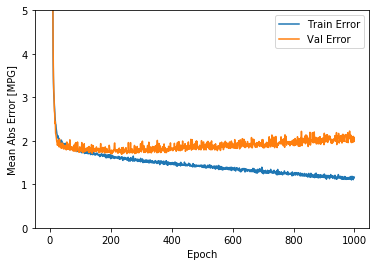

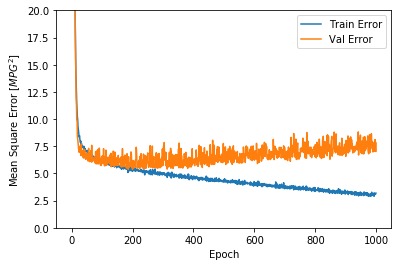

In [34]:
# Your plots might be slightly different, i.e. they should look very similar to the plots below!
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(nn_reg1_history)

> Based on the above plots, it looks like that there is not too much improvement after around 100 epochs. Later when we study Chapter 11, you will learn that there is a technique called `EarlyStopping` that can be used here which stops training if there is not much improvement after a fixed number of epochs. Moreover for now, you should fine-tune the hyperparameters of the network to see if you can see any improvements. Report the results of your hyperparameter tuning in the following cell. This is what's called <b>Grid Search</b> in hyperparameter tuning.

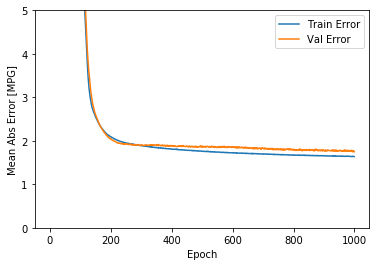

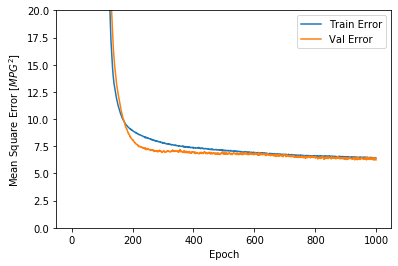

In [47]:
### START CODING HERE ### 
# Build another regression neural network with the same architecture,
# but you later compile it with different hyperparameters
nn_reg2 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=[len(X_train.keys())], activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
    ])

# Fine-tune the optimizer as follows:
# First, try a different optimizer - SGD with the learning_rate = 0.001
# Then, switch optimizer to Adam,
# and use three different values of learning_rate in the order of 10 or 10^(-1) like 0.01, 0.1 and 1.
# You may try other values for learning_rate.
# Report the results of your hyperparameter tuning in the following cell.
optimizer = tf.keras.optimizers.SGD(learning_rate = .001)

# Compile nn_reg2 with loss='mae', optimizer=optimizer and metrics=['mae', 'mse']
nn_reg2.compile(optimizer=optimizer, loss='mae', metrics=['mae','mse'])

# Fit nn_reg2 on X_train, y_train, epochs=EPOCHS, validation_split=0.2, verbose=0
nn_reg2_history = nn_reg2.fit(X_train, y_train, epochs=EPOCHS, validation_split=0.2, verbose=0)
### END CODING HERE ###

plot_history(nn_reg2_history)

In [48]:
### START CODING HERE ### 
# Evaluate nn_reg2 using .evaluate() method on X_test, y_test and verbose=2
loss2, mae2, mse2 = nn_reg2.evaluate(X_test, y_test, verbose=2)
### END CODING HERE ###

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae2))

79/79 - 0s - loss: 1.6796 - mae: 1.6796 - mse: 6.1643
Testing set Mean Abs Error:  1.68 MPG


Report the results of your hyperparameter tuning HERE:

SGD - Testing Set mae: 1.68 MPG
<br>
Adam learning_rate 0.01 - Testing Set mae: 1.97 MPG
<br>
Adam learning_rate 0.1 - Testing Set mae: 2.08 MPG
<br>
Adam learning_rate 1.0 - Testing Set mae: 5.81 MPG

> You can check the quality of the model predictions by the following plot. Use this plot to answer Part II Q1.

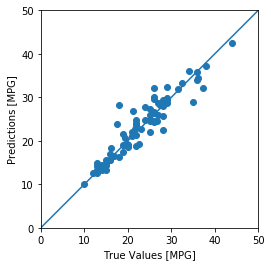

In [49]:
# Use the best hyperparameters you found for compiling nn_reg2, then run this cell
nn_reg2_preds = nn_reg2.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, nn_reg2_preds)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

## Part II - Questions

<b>ANSWER THE FOLLOWING QUESTIONS HERE:</b>

Q1- How do you interprete the plot above in terms of the model performance (Predictions vs True Values)? GIVE COMPLETE ANSWER!

The plot of Predicted vs True values is close to a 1:1. This indicates that the model is performing well because it is predicting realistic values.

Q2 - How do you interprete the first regression model's plots of mse and mae, i.e. `plot_history(nn_reg1_history)`? What is the impact of choosing `mse` vs `mae`? Why the axis scales are different for `mse` and `mae`? GIVE COMPLETE ANSWER!

The first model's plots of mse and mae indicate that as the number of Epochs increases, there is diminished improvement to the error. After 100 or so Epochs the error can actually increase as the model overfits. Both MSE and MAE can visualize this, but MSE makes the changes in error more dramatic because they are squared. This is also why the MSE axis is larger than MAE, the squared values result in larger numbers.

Q3 - What is the role of `validation_split` hyperparameter in `fit` method? What does it change exactly and why is it used? GIVE COMPLETE ANSWER!

The validation_split hyperparameter declares how large of a portion of the data will be reserved for validation. It is the portion of data that will be used to evaluate the loss at the end of each Epoch.

## Optional Part III - <font color=green>Extra Credit</font>

<b>Notice:</b> This part is totally optional and for earning <b><font color=green>extra credit</font></b> in the "Assignment" section of your final grade. Attempt this part only if you have enough time and you're inclined to challenge yourself a bit!<br>

[Download the video games dataset](https://raw.githubusercontent.com/fereydoonvafaei/UMBC-CMSC-478-Fall-2019/master/Assignment-4/video.csv)<br> 

You can read about the data [here](https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings). <br>

Build a neural network that can predict the "<b>Rating</b>" of each game based on other features. Alternatively, you may predict either the global sales or regional sales (in North America, Europe, etc) for each row/video game. Perform any necessary preprocessing steps needed on the dataset. <br>

You should create a separate notebook for Extra Credit attempt and submit it via a separate link in Blackboard. If you can get good results based on the instructor's judgement of your work, you may earn up to 50 points of extra credit for A5 that can be used for the missing points of "Assignment" section of your final grade.<br>

<b>Note:</b> Extra credits for A5 can only be used to compensate for "Assignment" section NOT for any other sections of the final grade such as quizzes or exams.

In [38]:
video_data = pd.read_csv('video.csv')
print(video_data.shape)
video_data.head()

(16719, 16)


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
video_data.dropna(inplace=True)
print(video_data.shape)
video_data.head()

(6825, 16)


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


## Grading

For Assignment 5, your notebook will be run and graded with a maximum of 100 points. Make sure that you get the correct outputs for all cells that you implement and answer ALL questions COMPLETELY. Also, your notebook should be written with no grammatical and spelling errors and should be nicely-formatted and easy-to-read.

The breakdown of the 100 points is as follows:

Part I implementaion has 40 points:
- 10 points: preprocessing steps.
- 15 points: nn_clf implementation, and compile.
- 15 points: correct ROC curve for nn_clf.

Part I questions have 10 points (5 points each).

Part II implementaion has 35 points:
- 10 points: preprocessing steps.
- 10 points: nn_reg1 implementation, and compile.
- 15 points: nn_reg2 implementation, and compile including hyperparameter tuning.

Part II questions have 15 points (5 points each).

Part III is optional and for Extra Credit only - up to 50 extra points based on the quality of your work.

Follow the instructions of each section carefully. Up to 10 points may be deducted if your submitted notebook is not easy to read and follow or if it has grammatical and spelling errors.

## How to Submit and Due Date

Name your notebook ```Lastname-A5.ipynb```. Submit the file using the ```Assignment-5``` link on Blackboard.

If you attempt the Extra Credit in Part III, create a separate notebook including all the necessary code, name it `Lastname-A5-EC.ipynb` and submit it using the ```A5-Extra-Credit``` link on Blackboard.

Grading will be based on 

  * correct implementation, correct answer to the questions, and
  * readability of the notebook.
  
<font color=red><b>Due Date: Monday December 2nd 11:59PM.</b></font>